In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm 

pd.set_option('display.max_columns', 50)

In [2]:
# read in the cleaned csv dataset 
sf_df = pd.read_csv("./Building_Permits_Clean.csv")

In [3]:
#Split the data fields

date_columns = [
    'Permit Creation Date',
    'Current Status Date',
    'Filed Date',
    'Issued Date',
    'First Construction Document Date',
    'Permit Expiration Date'
]

def splitDates(column):
    name = column[0:-4]
    sf_df[name+'Year'] = sf_df[column].astype(str).str[-4:]
    sf_df[name+'Year'] = pd.to_numeric(sf_df[name+'Year'], errors='coerce')
    sf_df[name+'Day'] = sf_df[column].astype(str).str[3:5]
    sf_df[name+'Day'] = pd.to_numeric(sf_df[name+'Day'], errors='coerce')
    sf_df[name+'Month'] = sf_df[column].astype(str).str[0:2]
    sf_df[name+'Month'] = pd.to_numeric(sf_df[name+'Month'], errors='coerce')
    
for column in date_columns:
    splitDates(column)
 

In [4]:
sf_df.sample(5)

,Unnamed: 0,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
72249,94748,8,08/07/2015,0310,013,77,Maiden,Ln,complete,08/20/2015,08/07/2015,08/10/2015,08/10/2015,7.0,08/04/2016,7600.0,10000.00,office,0.0,2.0,2.0,3.0,Financial District/South Beach,94108.0,2015,7,8,2015,20,8,2015,7,8,2015,10,8,2015,10,8,2016,4,8
69472,90923,8,07/02/2015,6564,014,4042,Cesar Chavez,St,complete,11/17/2015,07/02/2015,07/02/2015,07/02/2015,3.0,06/26/2016,30000.0,30000.00,1 family dwelling,1.0,0.0,5.0,8.0,Noe Valley,94131.0,2015,2,7,2015,17,11,2015,2,7,2015,2,7,2015,2,7,2016,26,6
133167,182326,8,09/13/2017,3507,040,1455,Market,St,issued,09/13/2017,09/13/2017,09/13/2017,09/13/2017,23.0,09/13/2018,54000.0,89213.58,office,0.0,2.0,1.0,6.0,South of Market,94103.0,2017,13,9,2017,13,9,2017,13,9,2017,13,9,2017,13,9,2018,13,9
17940,23586,8,09/03/2013,0983,008,3234,Washington,St,complete,12/12/2014,09/03/2013,09/03/2013,09/03/2013,3.0,08/29/2014,7700.0,8000.00,apartments,5.0,0.0,5.0,2.0,Presidio Heights,94115.0,2013,3,9,2014,12,12,2013,3,9,2013,3,9,2013,3,9,2014,29,8
106763,143508,8,11/28/2016,0644,006,1427,Larkin,St,issued,11/28/2016,11/28/2016,11/28/2016,11/28/2016,4.0,11/23/2017,2895.0,10000.00,apartments,9.0,0.0,5.0,3.0,Nob Hill,94109.0,2016,28,11,2016,28,11,2016,28,11,2016,28,11,2016,28,11,2017,23,11


In [5]:
sf_df['Permit Creation Year'].value_counts()

2015    30067
2016    28232
2014    28086
2013    27304
2017    26920
2018     3184
2012       21
Name: Permit Creation Year, dtype: int64

### Better target column

The column "Current Status" is not a good target column to predict due to the fact that there are too many status which could mean the same. So we are going to manually categorize these values.

In [6]:
sf_df['Current Status'].value_counts()

complete      94905
issued        45707
expired        1341
cancelled      1182
reinstated      446
suspend         175
revoked          49
approved          7
incomplete        1
withdrawn         1
Name: Current Status, dtype: int64

In [7]:
permitted_status = [
    'complete',
    'approved'
]

withdrawn_status = [
    'issued',
    'expired',
    'cancelled',
    'reinstated',
    'suspend',
    'revoked',
    'incomplete',
    'withdrawn'
]



In [8]:
for status in permitted_status:
    sf_df['Current Status'].replace(to_replace=status, value='1', inplace=True)
    
for status in withdrawn_status:
    sf_df['Current Status'].replace(to_replace=status, value='0', inplace=True)

In [9]:
sf_df['Current Status'].value_counts()

1    94912
0    48902
Name: Current Status, dtype: int64

In [14]:
plt.rcParams['figure.figsize'] = [5, 5]
correlation_matrix = sf_df.corr().round(2)
#sns.heatmap(data=correlation_matrix, annot=True)
correlation_matrix.style.background_gradient(cmap='coolwarm')
#correlation_matrix

,Unnamed: 0,Permit Type,Street Number,Number of Existing Stories,Estimated Cost,Revised Cost,Existing Units,Plansets,Existing Construction Type,Supervisor District,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
Unnamed: 0,1,0.03,-0,0.02,0,0,0.02,0,0,0,0,0.95,0,0.12,0.91,0,0.07,0.95,0,0.12,0.95,0.01,0.1,0.94,0.01,0.1,0.85,0.01,0
Permit Type,0.03,1,-0.01,0.03,-0.11,-0.11,-0.02,-0.01,0.02,-0.04,-0.01,0.07,-0.01,0,-0.08,-0,-0.01,0.07,-0.01,0,-0.04,0,-0.01,-0.06,0.01,-0.02,-0.18,-0.01,-0.02
Street Number,-0,-0.01,1,-0.21,-0.01,-0.01,-0.05,-0,0.22,-0.12,0.11,-0,-0,-0.01,-0,-0,0.01,-0.01,0,-0.01,-0,-0,-0,-0,0,-0,-0.02,-0.01,0
Number of Existing Stories,0.02,0.03,-0.21,1,0.05,0.05,0.27,0.01,-0.68,-0.16,-0.35,0.03,0,0.01,0.02,-0,-0.01,0.03,0,0.01,0.02,0,0,0.02,0,-0,0.08,0,0
Estimated Cost,0,-0.11,-0.01,0.05,1,0.98,0.05,0,-0.05,0.01,-0.01,-0.01,0,0,0.01,0,0.01,-0.01,0,0,0.01,0,0.01,0.01,-0,0.01,0.09,0,0.01
Revised Cost,0,-0.11,-0.01,0.05,0.98,1,0.05,0,-0.05,0.01,-0.01,-0.01,0,0,0.01,0,0.01,-0.01,0,0,0.01,0,0.01,0.02,0,0.01,0.09,0,0.01
Existing Units,0.02,-0.02,-0.05,0.27,0.05,0.05,1,0,-0.25,-0.04,-0.13,0.02,-0,-0,0.02,-0,-0,0.02,-0,-0,0.02,-0,-0,0.02,-0,-0,0.03,-0,0
Plansets,0,-0.01,-0,0.01,0,0,0,1,-0.01,0,-0.01,-0,0,0,0,0,0,-0,0,0,0,0,0,0,0,0,0.01,-0,0
Existing Construction Type,0,0.02,0.22,-0.68,-0.05,-0.05,-0.25,-0.01,1,0.14,0.39,-0,-0.01,-0,0.01,-0,0.01,-0,-0.01,-0,0,-0.01,0,0,-0.01,0.01,-0.07,0,0
Supervisor District,0,-0.04,-0.12,-0.16,0.01,0.01,-0.04,0,0.14,1,-0.04,-0,-0.01,0,0,0,0,-0,-0.01,0,0,0,0,0.01,-0,0.01,-0,-0,-0


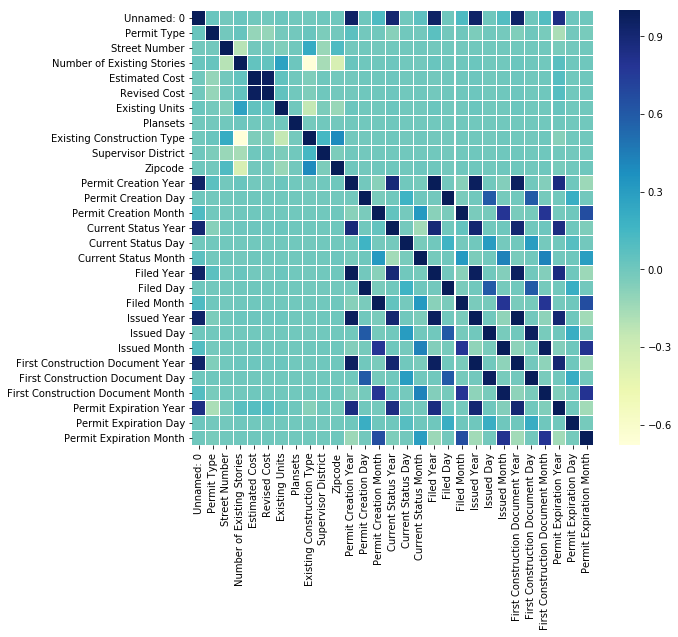

In [15]:
corrmat = sf_df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 